In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os

In [2]:
# 랜덤하게 각 주식의 가격 100개의 데이터 생성\
# 삼성 전자 주식 데이터
dates = pd.date_range(start='2021-01-04', periods=100, freq='D')
samsung_prices = [random.randint(80000, 90000) for _ in range(100)]
samsung_data = {'Date':dates, '005930.KS':samsung_prices}
samsung_df = pd.DataFrame(samsung_data)
samsung_df.set_index('Date', inplace=True)
samsung_df

,005930.KS
Date,
2021-01-04,89356
2021-01-05,82157
2021-01-06,81466
2021-01-07,82276
2021-01-08,87460
...,...
2021-04-09,82457
2021-04-10,87662
2021-04-11,86045


In [3]:
# LG 전자 주식 데이터
lg_prices = [random.randint(140000, 160000) for _ in range(100)]
lg_data = {'Date':dates, '066570.KS':lg_prices}
lg_df = pd.DataFrame(lg_data)
lg_df.set_index('Date', inplace=True)
lg_df

,066570.KS
Date,
2021-01-04,146036
2021-01-05,142196
2021-01-06,155976
2021-01-07,159277
2021-01-08,147309
...,...
2021-04-09,148507
2021-04-10,141780
2021-04-11,155962


In [4]:
# 두 데이터프레임을 합쳐서 하나의 데이터프레임으로 만들기
df = pd.concat([samsung_df, lg_df], axis=1)
df = df.loc[:, ['005930.KS', '066570.KS']]
df.columns = ['Samsung', 'LG']
df

,Samsung,LG
Date,,
2021-01-04,89356,146036
2021-01-05,82157,142196
2021-01-06,81466,155976
2021-01-07,82276,159277
2021-01-08,87460,147309
...,...,...
2021-04-09,82457,148507
2021-04-10,87662,141780
2021-04-11,86045,155962


In [5]:
# 폴더 생성
os.makedirs("./data", exist_ok=True)

# csv 파일로 저장
df.to_csv('./data/stock_price.csv')

In [6]:
# csv 읽기
df = pd.read_csv('./data/stock_price.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Samsung,LG
Date,,
2021-01-04,89356,146036
2021-01-05,82157,142196
2021-01-06,81466,155976
2021-01-07,82276,159277
2021-01-08,87460,147309
...,...,...
2021-04-09,82457,148507
2021-04-10,87662,141780
2021-04-11,86045,155962


In [7]:
# 두 종목의 수익률 계산
returns = df.pct_change()
returns

,Samsung,LG
Date,,
2021-01-04,NaN,NaN
2021-01-05,-0.080565,-0.026295
2021-01-06,-0.008411,0.096908
2021-01-07,0.009943,0.021164
2021-01-08,0.063007,-0.075140
...,...,...
2021-04-09,0.001153,-0.026911
2021-04-10,0.063124,-0.045298
2021-04-11,-0.018446,0.100028


In [8]:
# 수익률 간의 상관 계수 계산
corr_matrix = returns.corr()
corr_matrix

,Samsung,LG
Samsung,1.000000,0.053883
LG,0.053883,1.000000


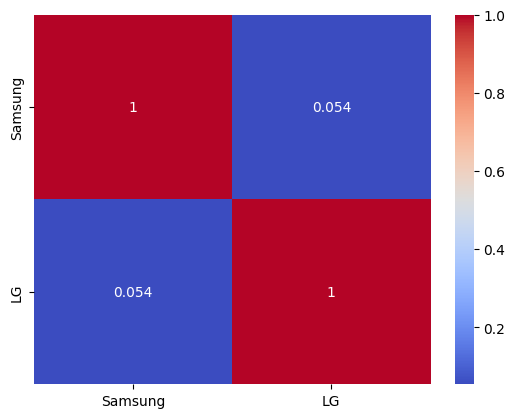

In [9]:
# 히트맵 그리기
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()